### 1. 
- Draw a linear regression line through the dataset dataset/w5-simple-regression-trainset.xlsx. 
- Please note: the excel file contains data only in Sheet1. Using Scikit-learn library allowed.


In [2]:
import pandas as pd

df = pd.read_excel('datasets/w5-multi-regression-trainset.xlsx')
df.head()

,x1,x2,x3,x4,y
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
# take out the x4 column because it is a different type
data_filtered = df[['x1','x2','x3','y']]
data_filtered.head()

,x1,x2,x3,y
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [22]:
# first shuffle the data
shuffled_data = data_filtered.sample(frac=1)
shuffled_data.head()

,x1,x2,x3,y
32,44069.95,51283.14,197029.42,89949.14
22,72107.60,127864.55,353183.81,105008.31
2,153441.51,101145.55,407934.54,191050.39
21,75328.87,144135.98,134050.07,105733.54
6,134615.46,147198.87,127716.82,156122.51


In [23]:
shuffled_data.shape

(45, 4)

In [24]:
# split the data into training and test set
n_training = shuffled_data.shape[0]//2
n_training

22

In [25]:
data_train = shuffled_data.iloc[0:n_training,:]
data_train.shape

(22, 4)

In [26]:
data_test = shuffled_data.iloc[n_training:,:]
data_test.shape

(23, 4)

In [84]:
data_train_x = data_train[['x2']].values.reshape(-1,1)
data_train_x.shape

(22, 1)

In [85]:
data_train_y = data_train[['y']].values.reshape(-1,1)
data_train_y.shape


(22, 1)

In [86]:
data_test_x = data_test[['x2']].values.reshape(-1,1)
data_test_y = data_test[['y']].values.reshape(-1,1)
print(data_test_x.shape)
print(data_test_y.shape)

(23, 1)
(23, 1)


In [87]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=data_train_x, y=data_train_y)

LinearRegression()

In [88]:
pred = model.predict(data_test_x)


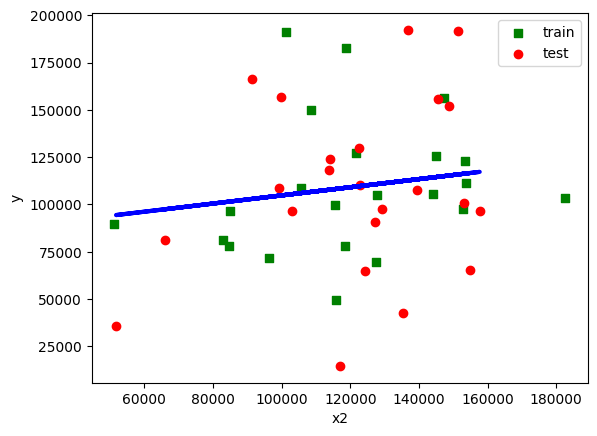

In [89]:
# Plot outputs
import matplotlib.pyplot as plt
plt_train = plt.scatter(data_train_x, data_train_y,  marker='s', color='green')
plt_test = plt.scatter(data_test_x, data_test_y,  marker='o', color='red')
plt.plot(data_test_x, pred, color='blue', linewidth=3)
plt.legend ((plt_train, plt_test), ('train', 'test'))
plt.xlabel ("x2")
plt.ylabel ("y")

plt.show()

In [90]:
model.coef_

array([[0.21549437]])

In [91]:
model.intercept_

array([83259.4049507])

- Regression line equation: y = .215x + 83259.4

### 2.
- Draw polynomial regression lines of degree **2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100** through the dataset. 
- Evaluate each of the models (including the model in #1) on the test set dataset/w5-simple-testset.xlsx in terms of RMSE and R2-score. Comments? 
- Using scikit-learn library allowed.

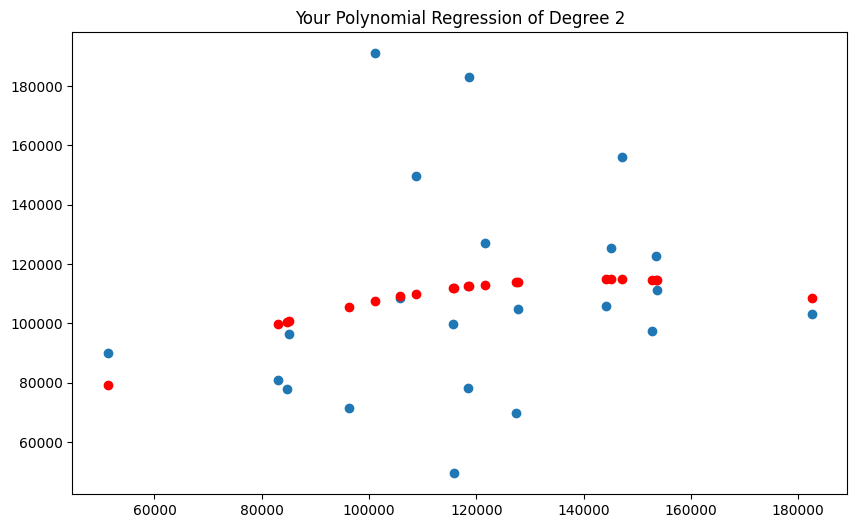

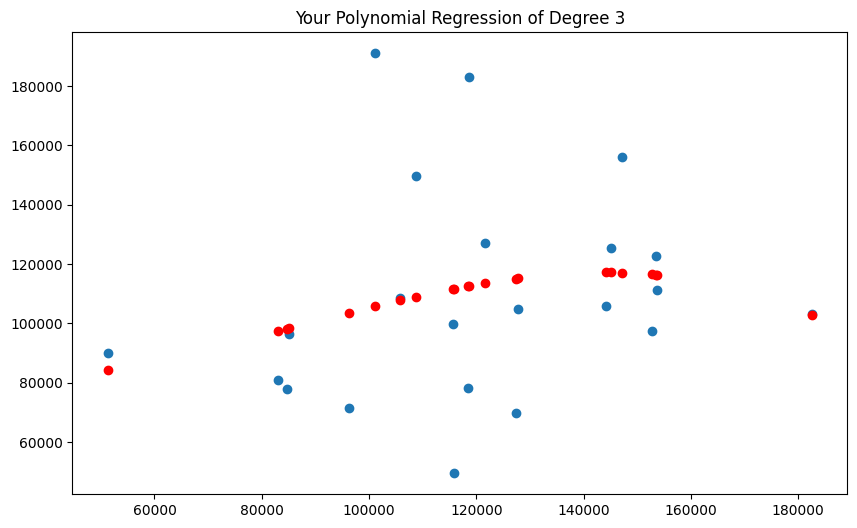

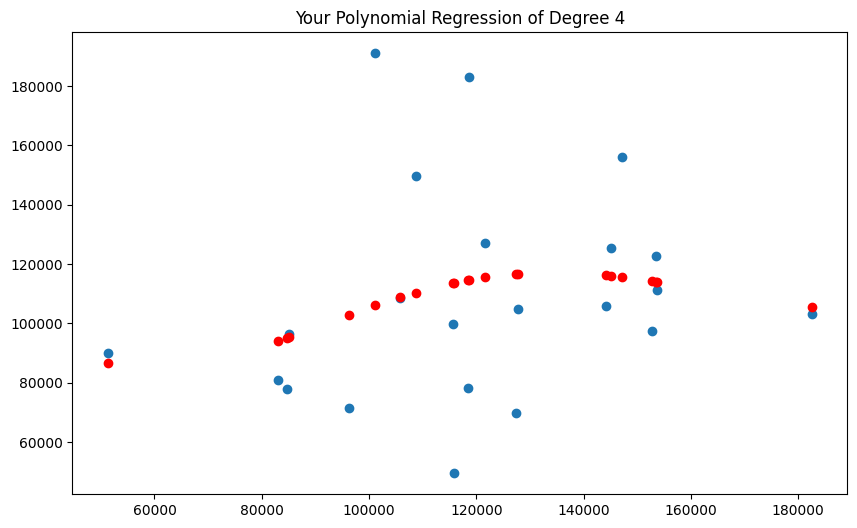

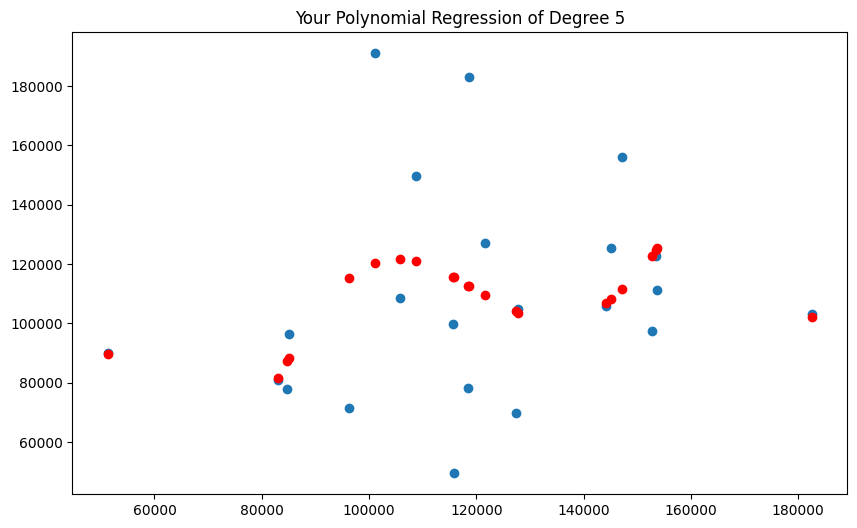

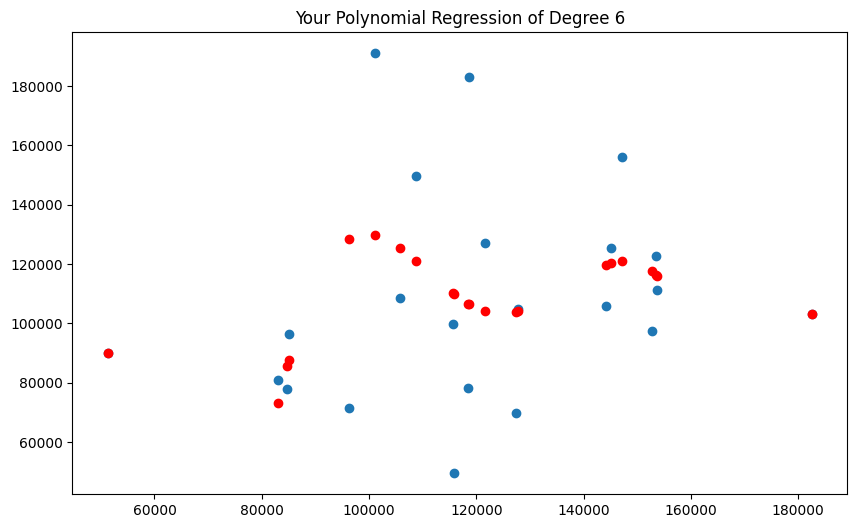

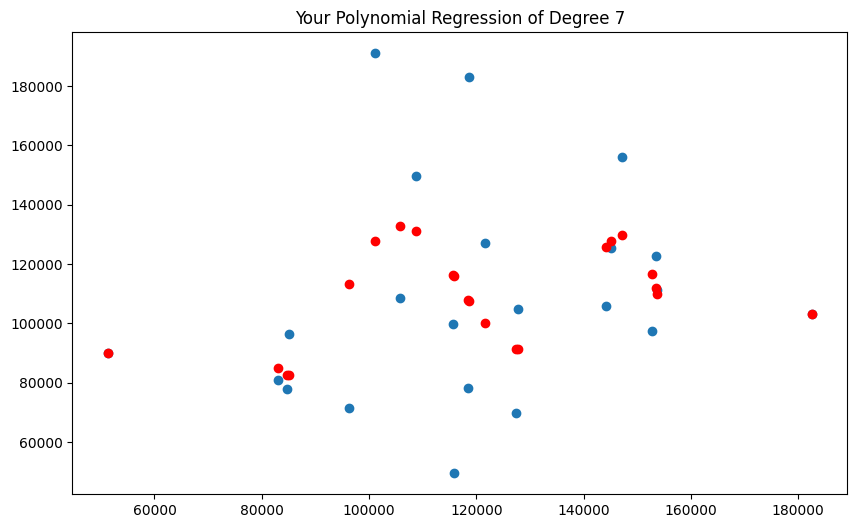

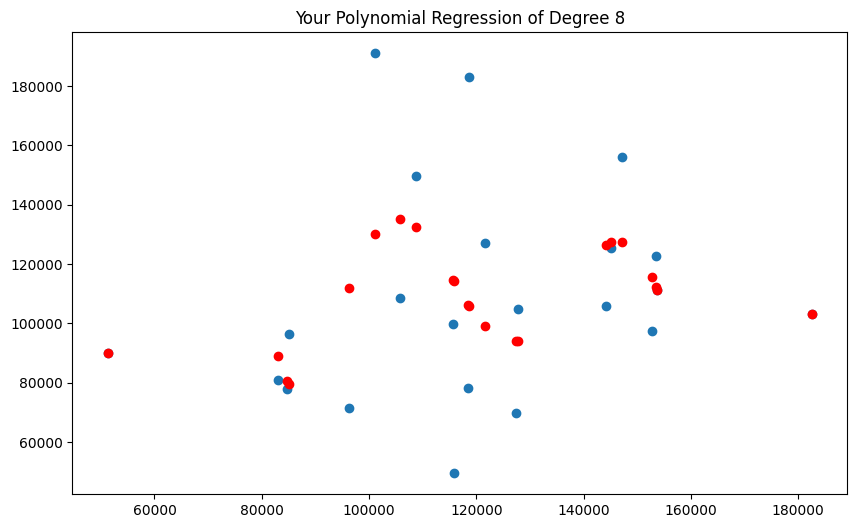

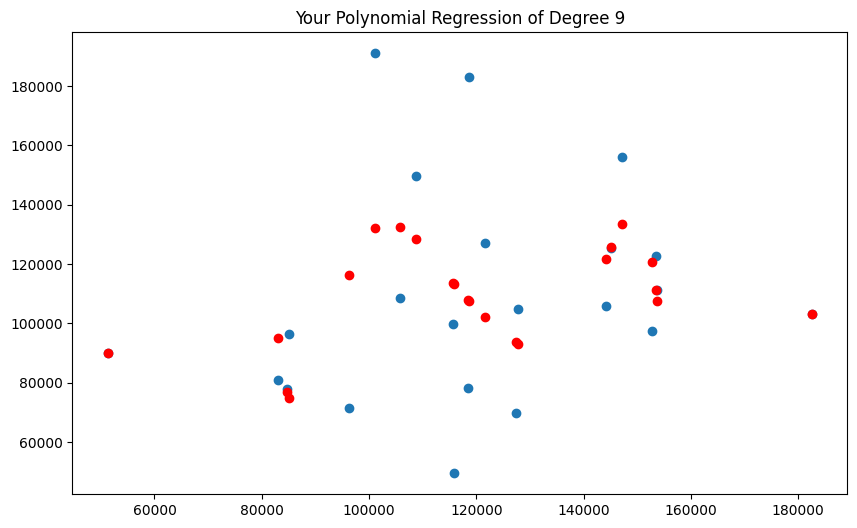

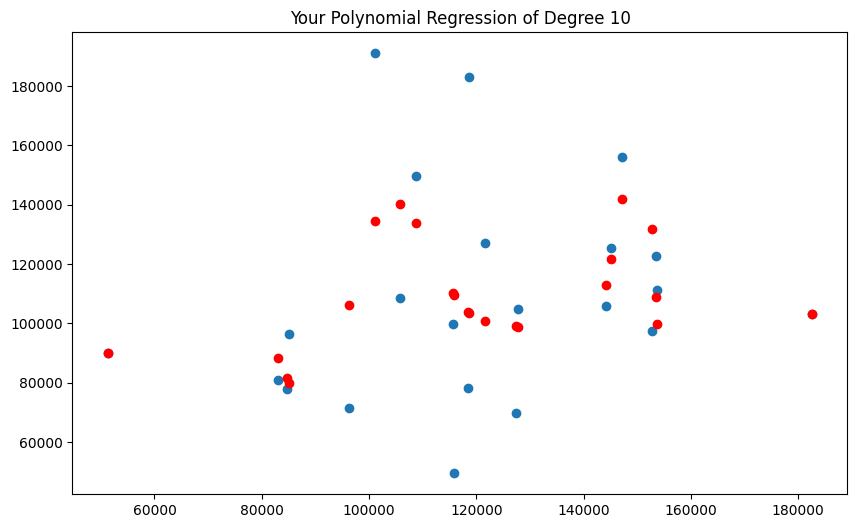

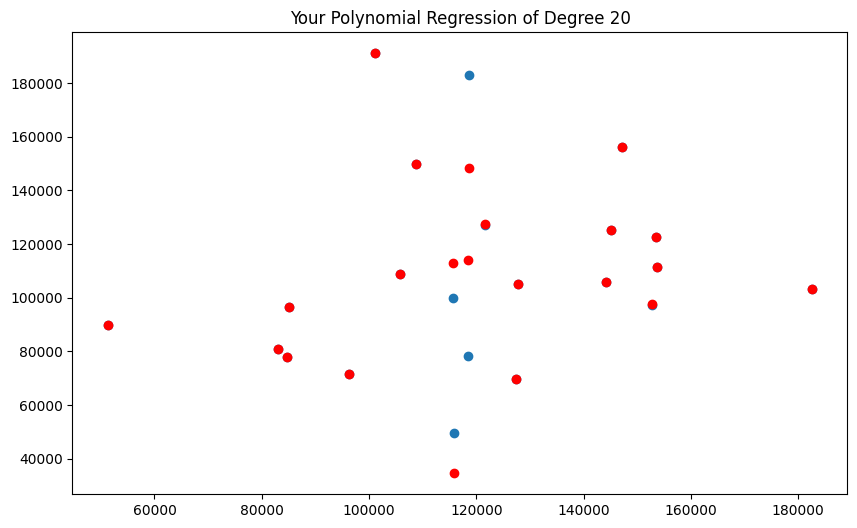

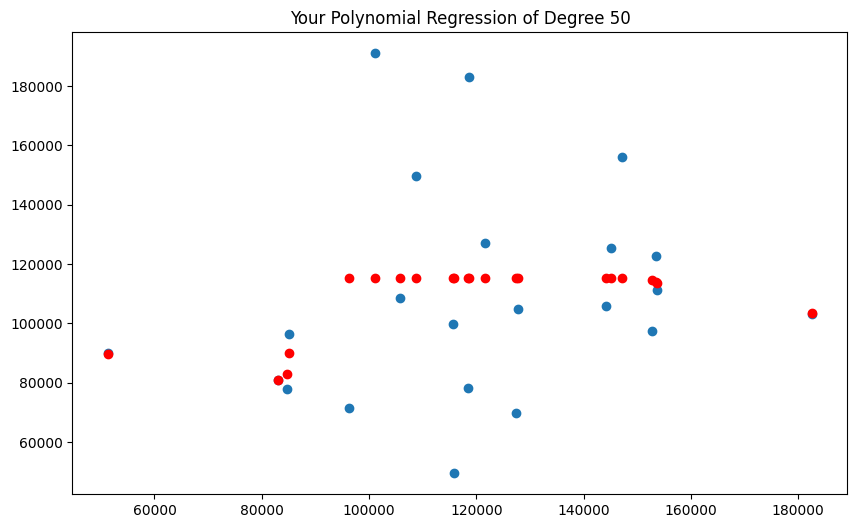

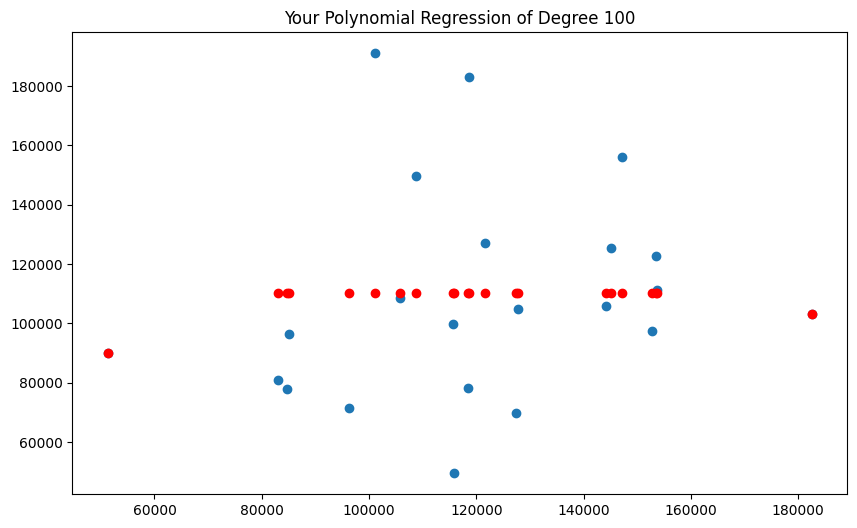

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_x = scaler.fit_transform(data_train_x)

degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]


for degree in degrees: 
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features_train = poly.fit_transform(scaled_train_x)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features_train, data_train_y)
    y_predicted = poly_reg_model.predict(poly_features_train)
    plt.figure(figsize=(10,6))
    plt.title(f"Your Polynomial Regression of Degree {degree}")
    plt.scatter(data_train_x,data_train_y)
    plt.scatter(data_train_x,y_predicted, c='red')
    plt.show()



